In [78]:
import geopandas

from litecoder.models import WOFLocality

In [3]:
import matplotlib.pyplot as plt

In [50]:
usa = geopandas.read_file('../data/cb_2017_us_nation_5m/cb_2017_us_nation_5m.shp')

In [52]:
water = geopandas.read_file('../data/USA_Detailed_Water_Bodies/USA_Detailed_Water_Bodies.shp')

In [71]:
al_buildings = geopandas.read_file('../data/Alabama.geojson')

In [53]:
water.sindex

In [72]:
al_buildings.sindex

In [93]:
def plot_city(name, r=0.2):

    city = (
        WOFLocality.query
        .filter(
            (WOFLocality.name==name)&
            (WOFLocality.name_a1=='Alabama')
        )
        .one())

    bounds = (
        city.longitude-r,
        city.latitude-r,
        city.longitude+r,
        city.latitude+r,
    )

    ax = usa.plot(color='white', edgecolor='black', figsize=(20,20))

    widx = list(water.sindex.intersection(bounds))
    water.iloc[list(widx)].plot(ax=ax)
    print('water', len(widx))

    bidx = list(al_buildings.sindex.intersection(bounds))
    al_buildings.iloc[bidx].plot(ax=ax, color='black')
    print('buildings', len(bidx))

    plt.xlim(bounds[0], bounds[2])
    plt.ylim(bounds[1], bounds[3])

water 209
buildings 146277


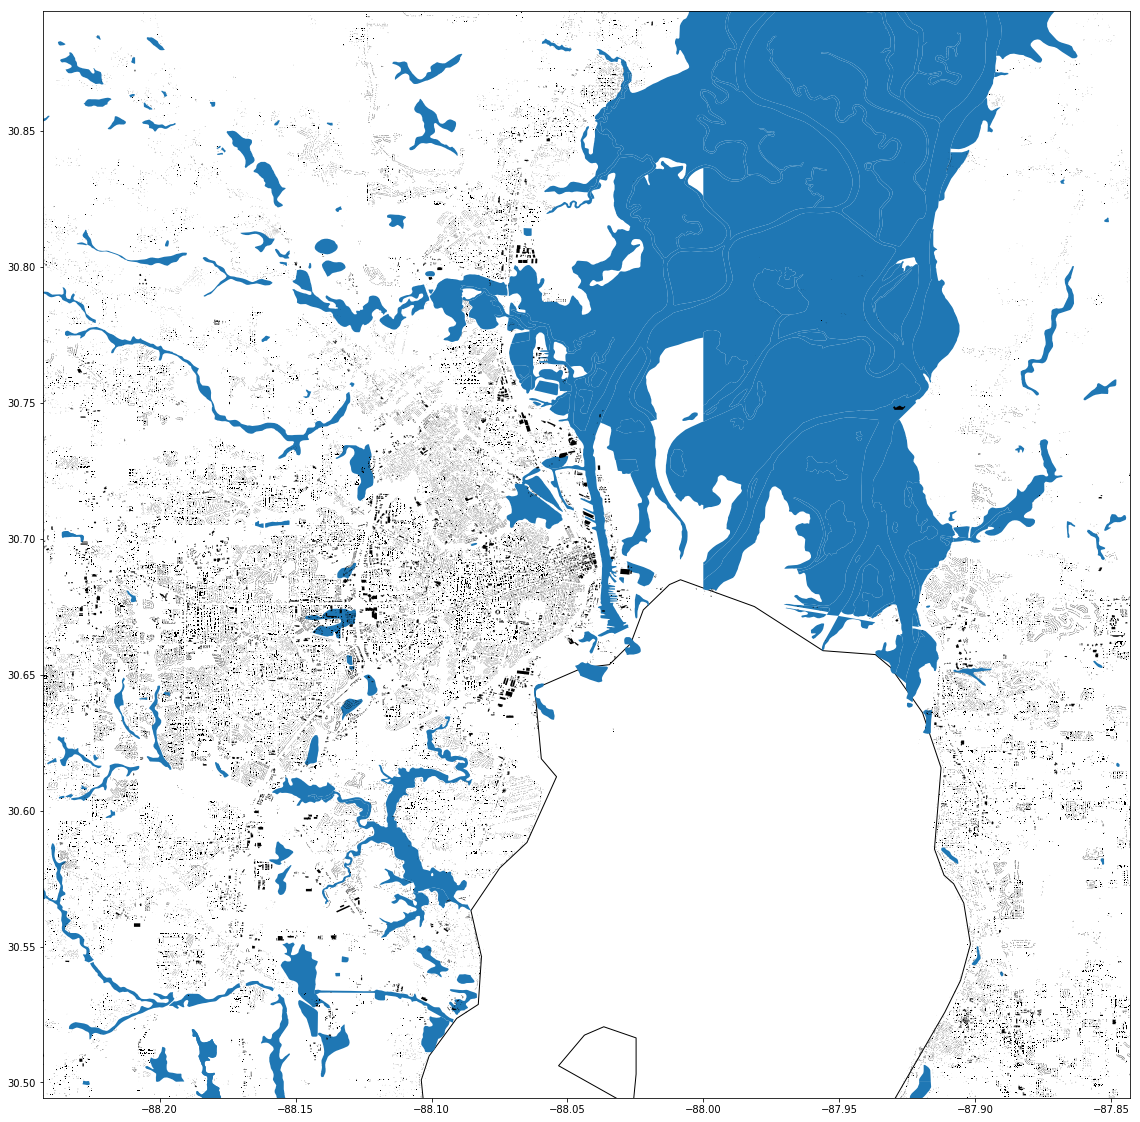

In [99]:
plot_city('Mobile')

water 284
buildings 66051


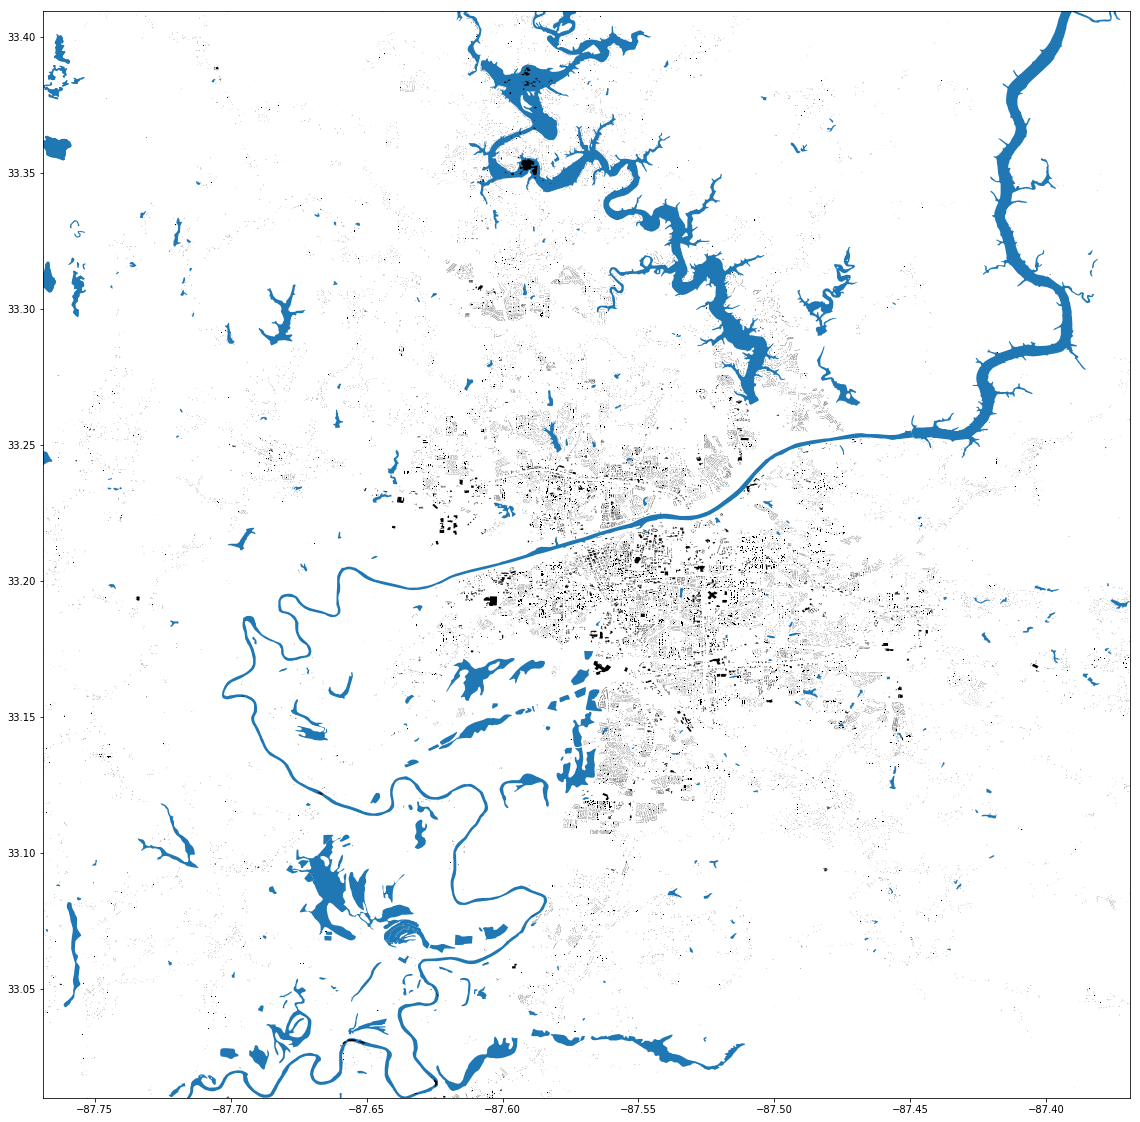

In [95]:
plot_city('Tuscaloosa')

water 145
buildings 242998


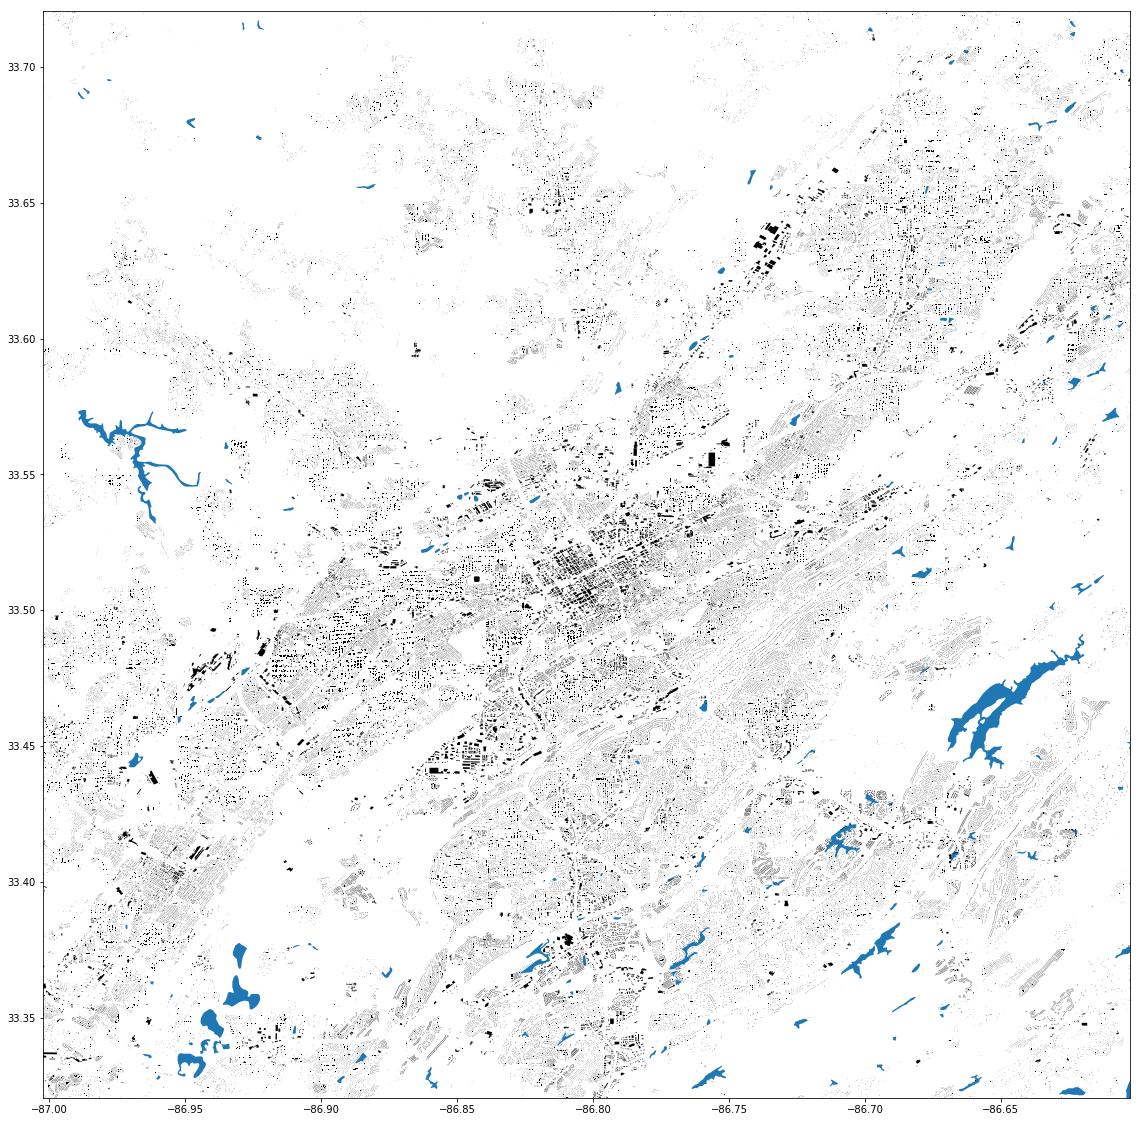

In [96]:
plot_city('Birmingham')

water 91
buildings 136832


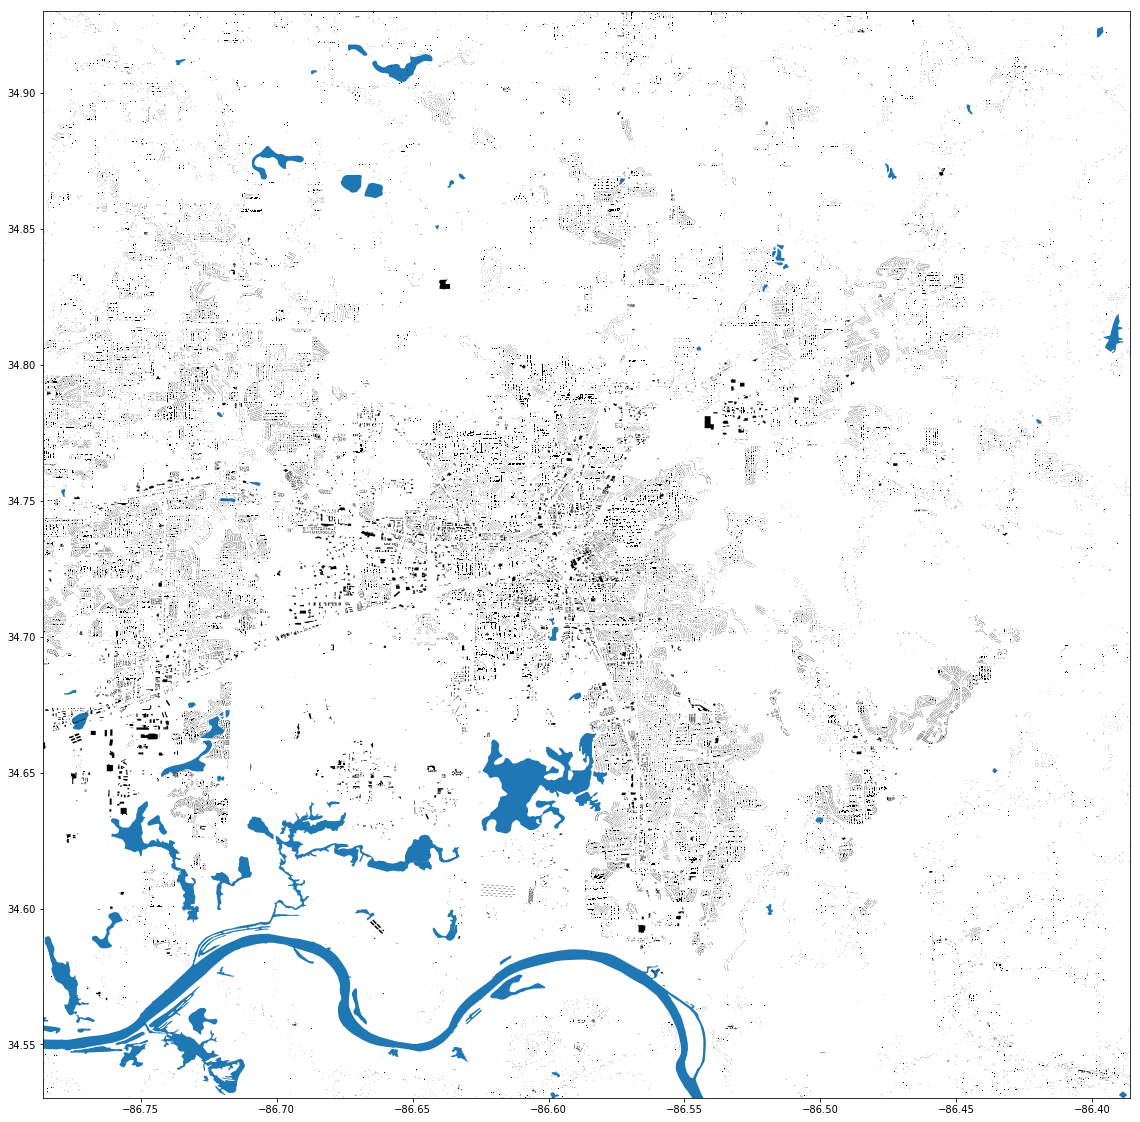

In [97]:
plot_city('Huntsville')

water 3653
buildings 675964


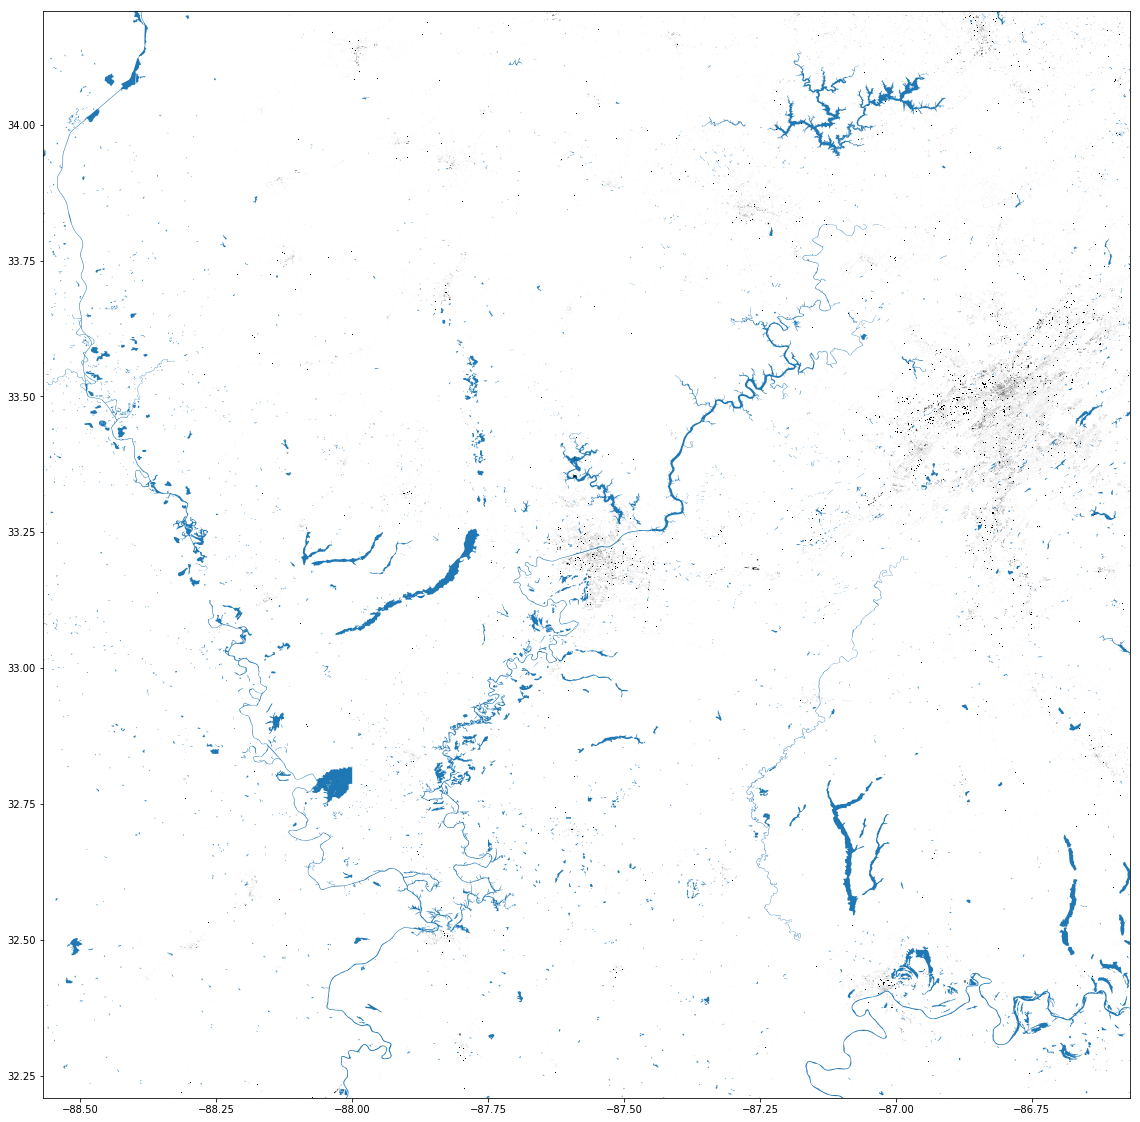

In [100]:
plot_city('Tuscaloosa', 1)